In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import xlrd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "/content/copper_new_dataset_.csv"

# Read the Excel file
df = pd.read_csv(file_path)

In [4]:
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,104991,1668701718,2021-04-01,1047.0


In [5]:
df.shape

(181631, 14)

In [6]:
df_new = df.drop(columns=['id', 'item_date','material_ref','delivery date'])


In [7]:
df_new.head(2)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0


In [8]:
df_new.shape

(181631, 10)

In [9]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181631 entries, 0 to 181630
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181631 non-null  float64
 1   customer       181631 non-null  float64
 2   country        181631 non-null  float64
 3   status         181631 non-null  object 
 4   item type      181631 non-null  object 
 5   application    181631 non-null  float64
 6   thickness      181631 non-null  float64
 7   width          181631 non-null  float64
 8   product_ref    181631 non-null  int64  
 9   selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ MB


In [11]:
#df_new['country'] =  df_new['country'].astype(str)


In [10]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181631 entries, 0 to 181630
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   quantity tons  181631 non-null  float64
 1   customer       181631 non-null  float64
 2   country        181631 non-null  float64
 3   status         181631 non-null  object 
 4   item type      181631 non-null  object 
 5   application    181631 non-null  float64
 6   thickness      181631 non-null  float64
 7   width          181631 non-null  float64
 8   product_ref    181631 non-null  int64  
 9   selling_price  181631 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 13.9+ MB


In [11]:
df_new = df_new[(df_new[['quantity tons','customer','country','application','thickness','width','product_ref',]] >= 0).all(axis=1)]

In [12]:
df_new.shape

(181627, 10)

<Axes: >

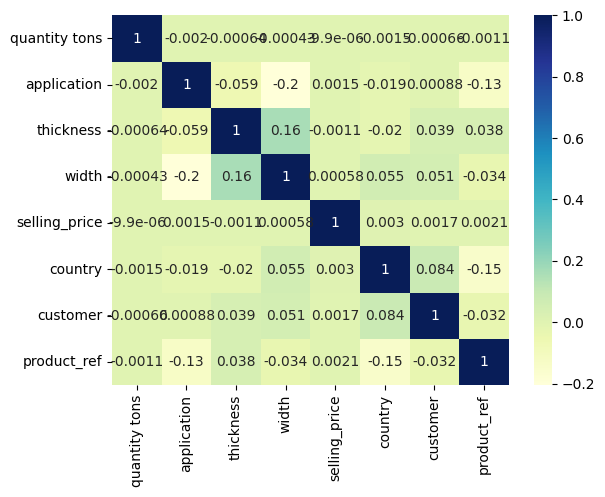

In [13]:
x1=df_new[['quantity tons','application','thickness','width','selling_price','country','customer','product_ref']].corr()
import seaborn as sns
sns.heatmap(x1, annot=True, cmap="YlGnBu")

In [14]:
df_new.head(2)

,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,selling_price
0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,854.0
1,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,1047.0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

df_new = df_new.dropna(subset=['selling_price'])
# Define features and target
x = df_new[['quantity tons','customer','product_ref','status','country','application','thickness','width']]
y = df_new['selling_price']

# Perform one-hot encoding on categorical features
categorical_features = ['customer', 'product_ref', 'status', 'country', 'application']
x = pd.get_dummies(x, columns=categorical_features) # Apply one-hot encoding

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Create and train the model
decision_regressor = DecisionTreeRegressor(random_state=42,ccp_alpha=0.01)
model = decision_regressor.fit(x_train, y_train) # This line should now work without error

# ... (rest of your code)

y_pred = decision_regressor.predict(x_test)

#mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

rf_r2 = r2_score(y_test, y_pred)

#print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", rf_r2)

Mean Squared Error (MSE): 25659.349603349074
Root Mean Squared Error (RMSE): 160.18536014052307
R-squared (R2) Score: 0.49717504936681545


In [17]:
model

DecisionTreeRegressor(ccp_alpha=0.01, random_state=42)

In [18]:
import pickle
from google.colab import files

pkl_filename = "copper_tree_regression_model.pkl"
with open(pkl_filename,'wb') as file:
  pickle.dump(model,file)

#files.download(pkl_filename)
print("Saved to disk")

Saved to disk
